In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
cpustats = pd.read_csv("/kaggle/input/smartphone-processors-ranking/smartphone_cpu_stats.csv")
MLstats = pd.read_csv("/kaggle/input/smartphone-processors-ranking/ML_ALL_benchmarks.csv")
antutu = pd.read_csv("/kaggle/input/smartphone-processors-ranking/antutu_android_vs_ios_v4.csv")

In [5]:
cpustats

,rank,company,cpuName,geekbenchSingle,geekbenchMulti,antutu9,coreCount,coreConfig,clockSpeed,gpu
0,1,Apple,A15 Bionic,1727,4688,794346,6,(2+4),3223,Apple GPU
1,2,MediaTek,Dimensity 9000,1269,4267,1017817,8,(1+3+4),3050,Mali-G710
2,3,Qualcomm,Snapdragon 8 Gen 1,1213,3765,1028349,8,(1+3+4),3000,Adreno 730
3,4,Apple,A14 Bionic,1581,4093,730211,6,(2+4),3100,Apple GPU
4,5,Qualcomm,Snapdragon 888 Plus,1162,3626,838764,8,(1+3+4),2995,Adreno 660
...,...,...,...,...,...,...,...,...,...,...
120,121,MediaTek,Helio P23,153,851,109039,8,(4+4),2300,Mali-G71 MP2
121,122,Samsung,Exynos 7884B,246,894,103821,8,(2+6),1560,Mali-G71 MP2
122,123,HiSilicon,Kirin 659,193,878,120426,8,(4+4),2360,Mali-T830 MP2
123,124,Samsung,Exynos 7420,259,873,95445,8,(4+4),2100,Mali-T760 MP8


In [7]:
MLstats

,device,company,cpuName,cores,clock,cpuScore,gpuScore,npuScore
0,iPhone 13 Pro Max,Apple,A15 Bionic,6,3230,935,2273,2676
1,iPhone 13 Pro,Apple,A15 Bionic,6,3230,931,2261,2665
2,iPhone 13 mini,Apple,A15 Bionic,6,3230,924,1852,2660
3,iPad Pro (12.9-inch 5th generation),Apple,M1,8,3190,1013,2824,2657
4,iPad Pro (11-inch 3rd generation),Apple,M1,8,3190,1011,2842,2656
...,...,...,...,...,...,...,...,...
183,Samsung Galaxy Note FE,Samsung,Exynos 8890,8,1300,133,400,71
184,Huawei Nexus 6P,Qualcomm,Snapdragon 810,8,1555,85,111,71
185,LG Nexus 5X,Qualcomm,Snapdragon 808,6,1440,78,75,68
186,LG V30,Qualcomm,Snapdragon 835,8,1900,146,504,66


In [8]:
antutu

,Device,CPU,GPU,MEM,UX,Total Score
0,iPad Pro 5 (12.9-inch) (8+256),351192,741383,183160,153993,1429728
1,iPad Pro 5 (11-inch) (8+128),351212,722399,137145,149463,1360219
2,iPad Air 5 (8+64),345275,635015,107955,140140,1228385
3,Red Magic 7 (S-8 Gen 1 18/256),235998,445681,175442,181650,1038771
4,Redmi K50 Pro (M-9000 8/128),244999,390026,169449,182367,986840
...,...,...,...,...,...,...
174,Infinix Hot 11S (M-G88 6/128),67728,61200,44181,82926,256035
175,Redmi 10 (M-G88 6/128),62902,58096,41767,80297,243061
176,Galaxy A51 (E-9611 6/128),55203,62849,45941,67989,231982
177,Galaxy M31 (E-9611 6/128),55772,61407,46470,67868,231515


In [9]:
cpustats.columns

Index(['rank', 'company', 'cpuName', 'geekbenchSingle', 'geekbenchMulti',
       'antutu9', 'coreCount', 'coreConfig', 'clockSpeed', 'gpu'],
      dtype='object')

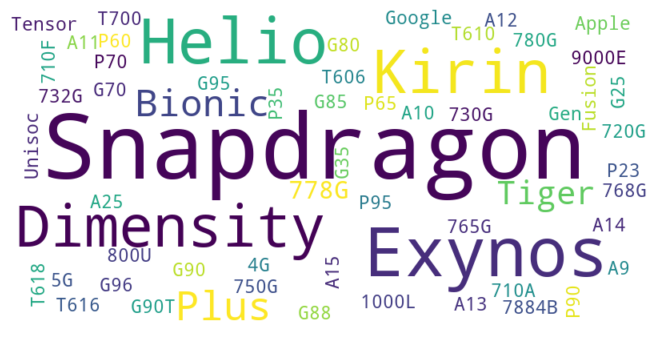

In [10]:
text = " ".join(review for review in cpustats.cpuName.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

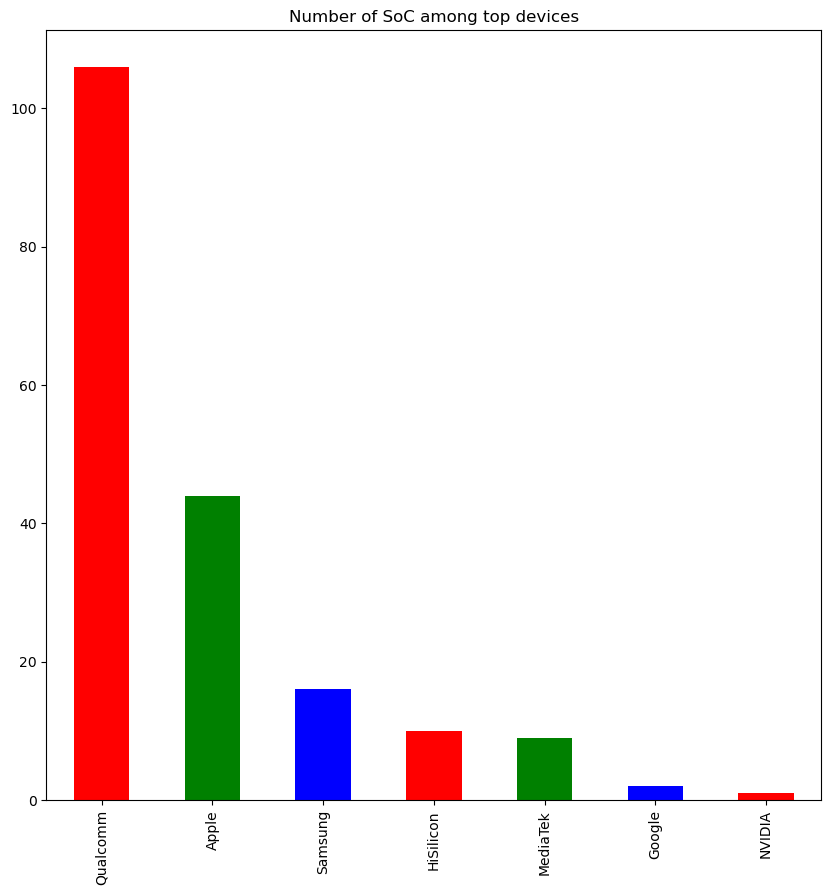

In [11]:
fig = plt.figure(figsize =(10, 10))
MLstats['company'].value_counts().plot.bar(color=['red','green','blue'])
plt.title('Number of SoC among top devices')
plt.show()

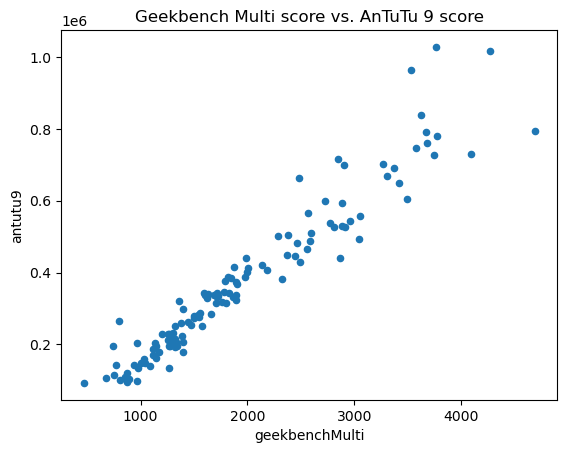

In [12]:
cpustats2 = cpustats[['geekbenchMulti','antutu9']]
cpustats2.plot(x ='geekbenchMulti', y='antutu9', kind = 'scatter')
plt.title('Geekbench Multi score vs. AnTuTu 9 score')
plt.show()

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical

In [17]:
X = data.iloc[:, :-1].values # Features
y = data.iloc[:, -1].values # Labels

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
